In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('seeds.csv')
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
class_1 = df[df.Type == 1]
class_2 = df[df.Type == 2]
class_3 = df[df.Type == 3]

In [4]:
def generateCombinations(a):
    ans = []
    for i in range(len(a)):
        for j in range(i+1, len(a)):
            ans.append([a[i], a[j]])
    return ans        

In [5]:
features = df.columns.to_list()
features.remove('Type')
combinations = generateCombinations(features)

C:\Users\javadpsk\AppData\Local\Temp\ipykernel_17788\746283486.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


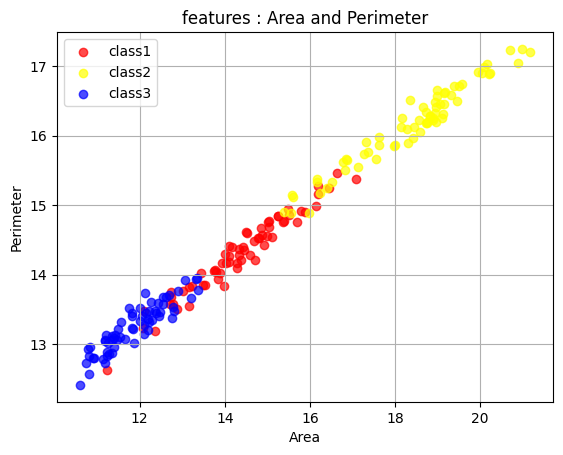

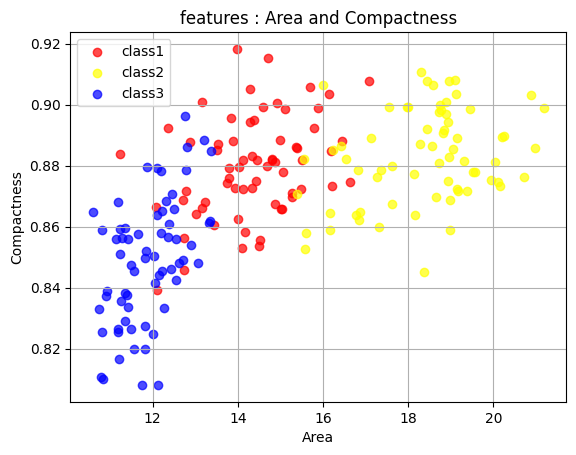

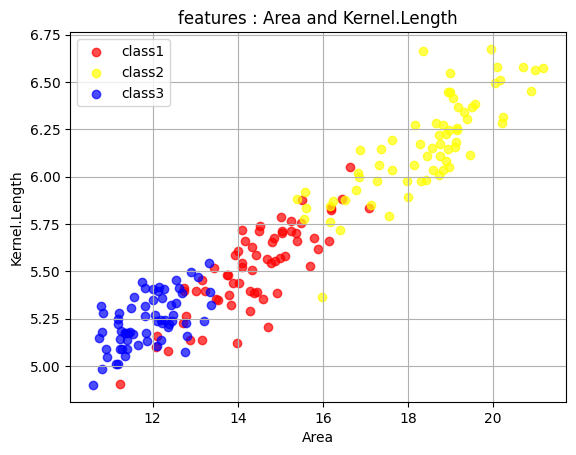

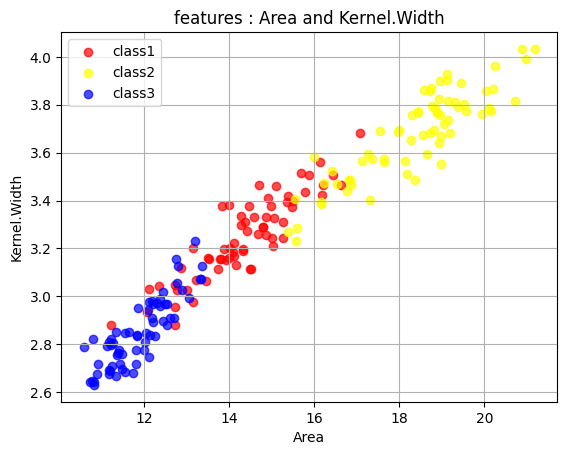

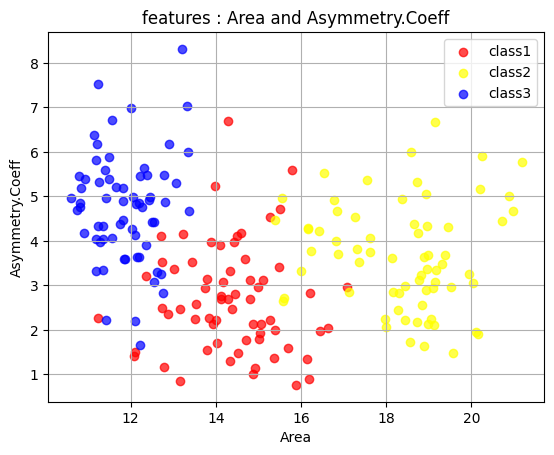

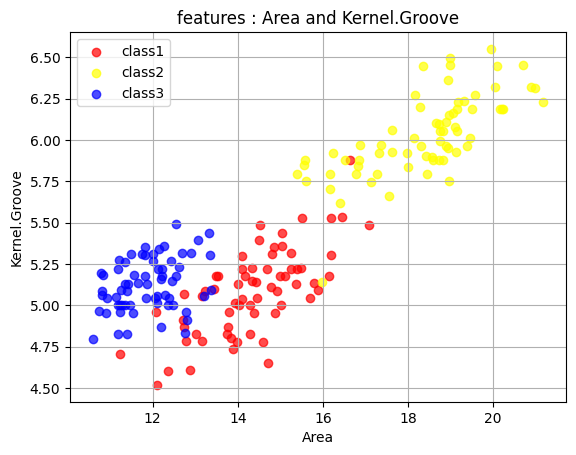

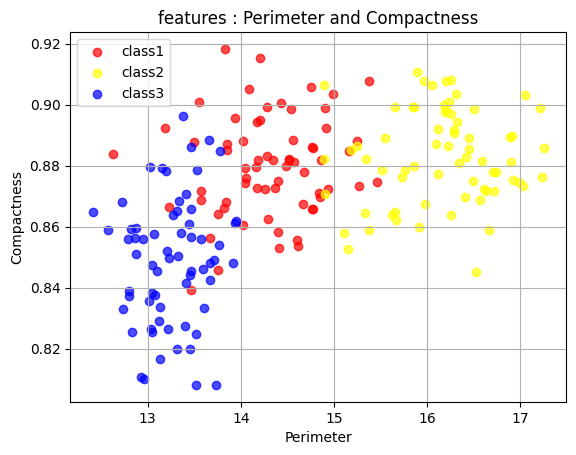

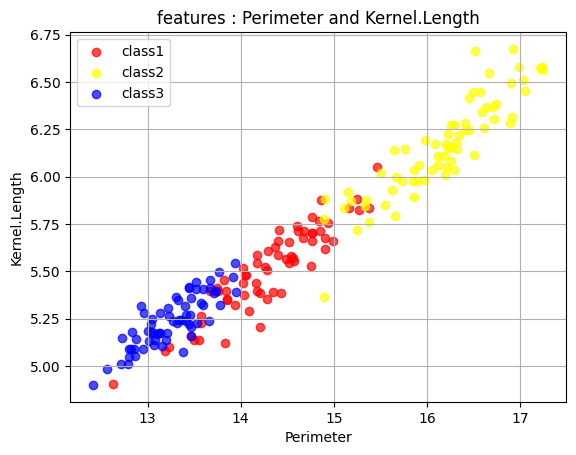

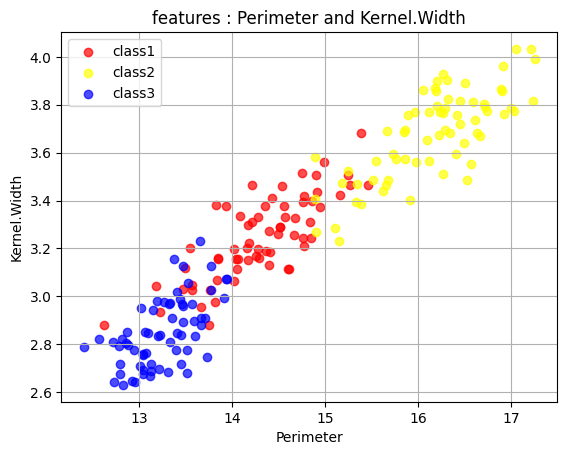

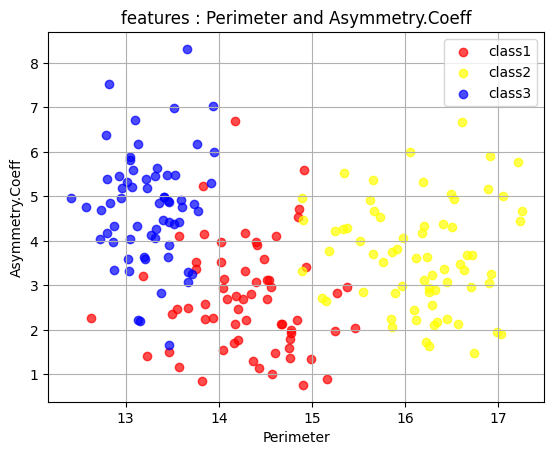

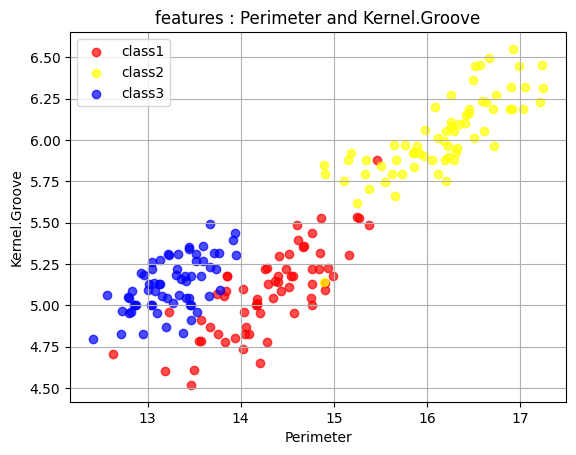

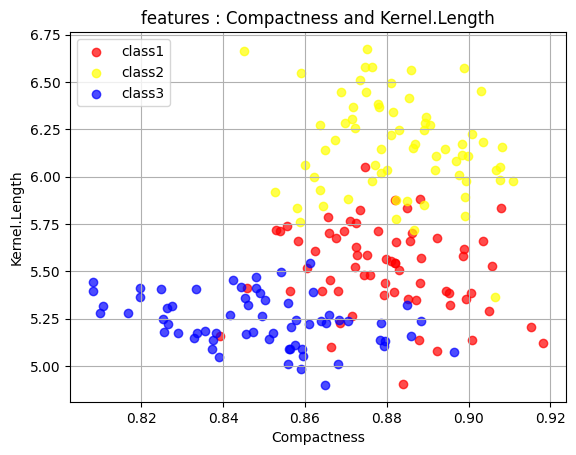

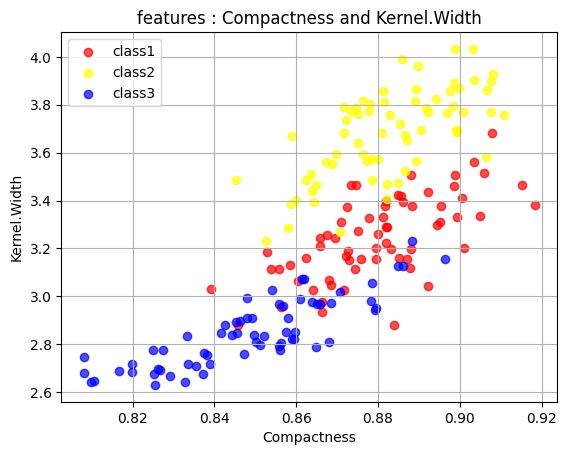

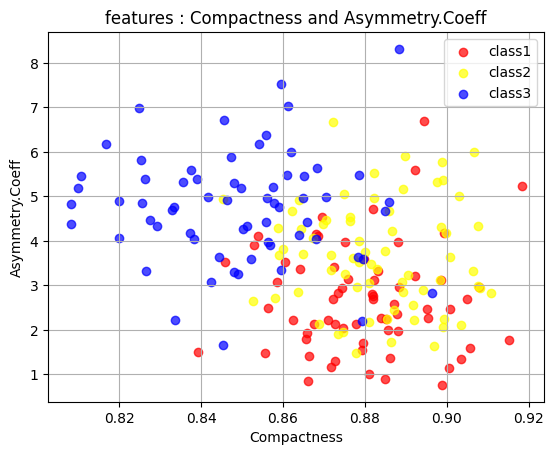

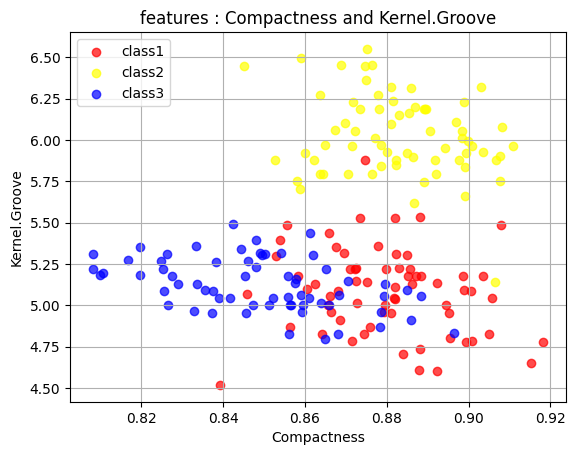

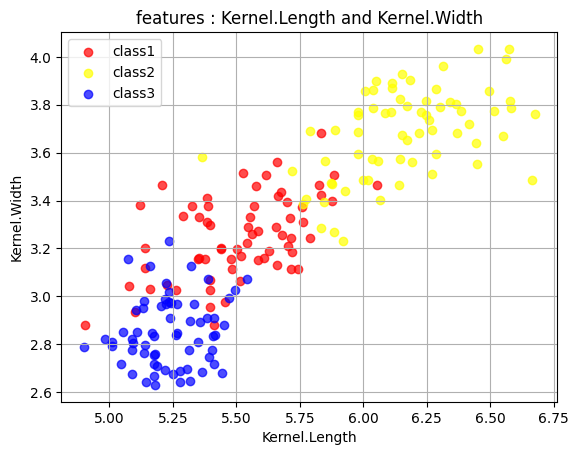

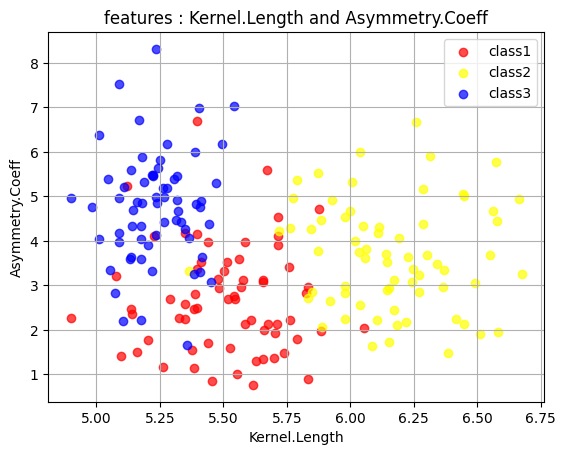

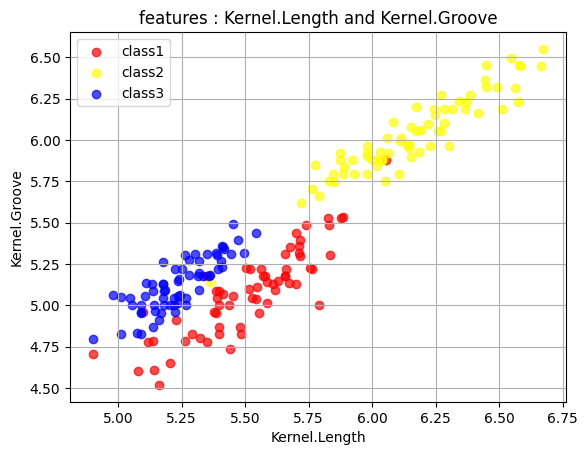

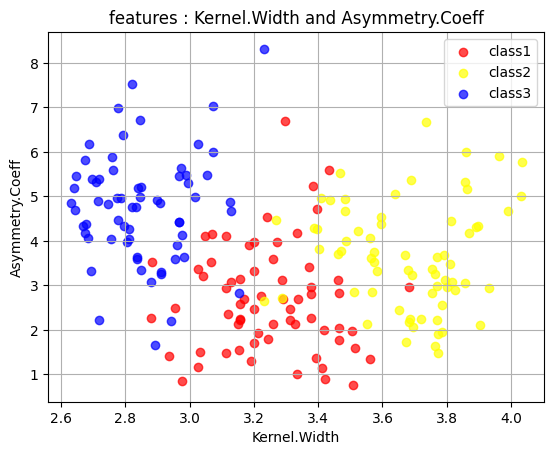

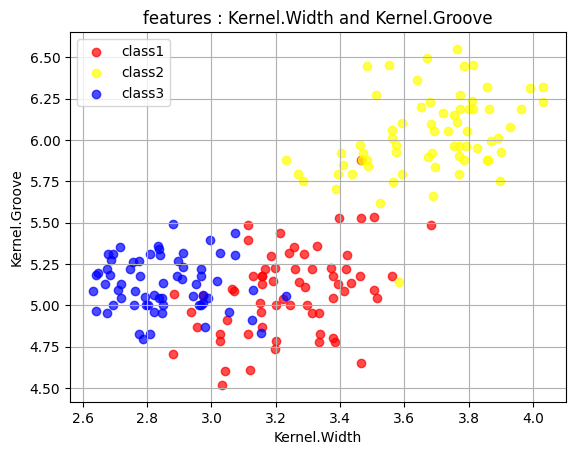

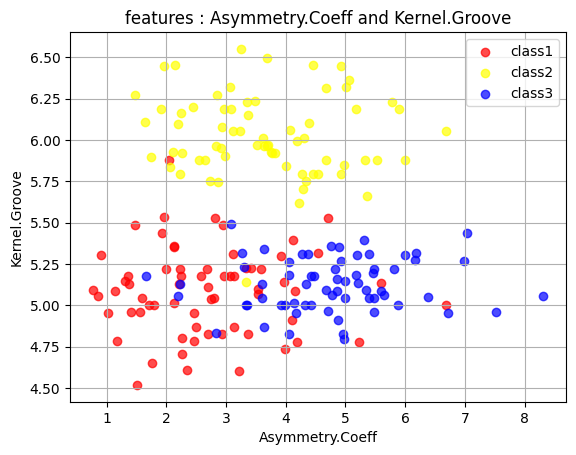

In [6]:
for featureSet in combinations:
    plt.figure()
    plt.xlabel(featureSet[0])
    plt.ylabel(featureSet[1])
    plt.title("features : " + featureSet[0] + " and " + featureSet[1])
    plt.grid(True)
    plt.scatter(class_1[featureSet[0]], class_1[featureSet[1]], alpha=0.7, label = "class1", color = 'red')
    plt.scatter(class_2[featureSet[0]], class_2[featureSet[1]], alpha=0.7, label = "class2", color = 'yellow')
    plt.scatter(class_3[featureSet[0]], class_3[featureSet[1]], alpha=0.7, label = "class3", color = 'blue')
    plt.legend()

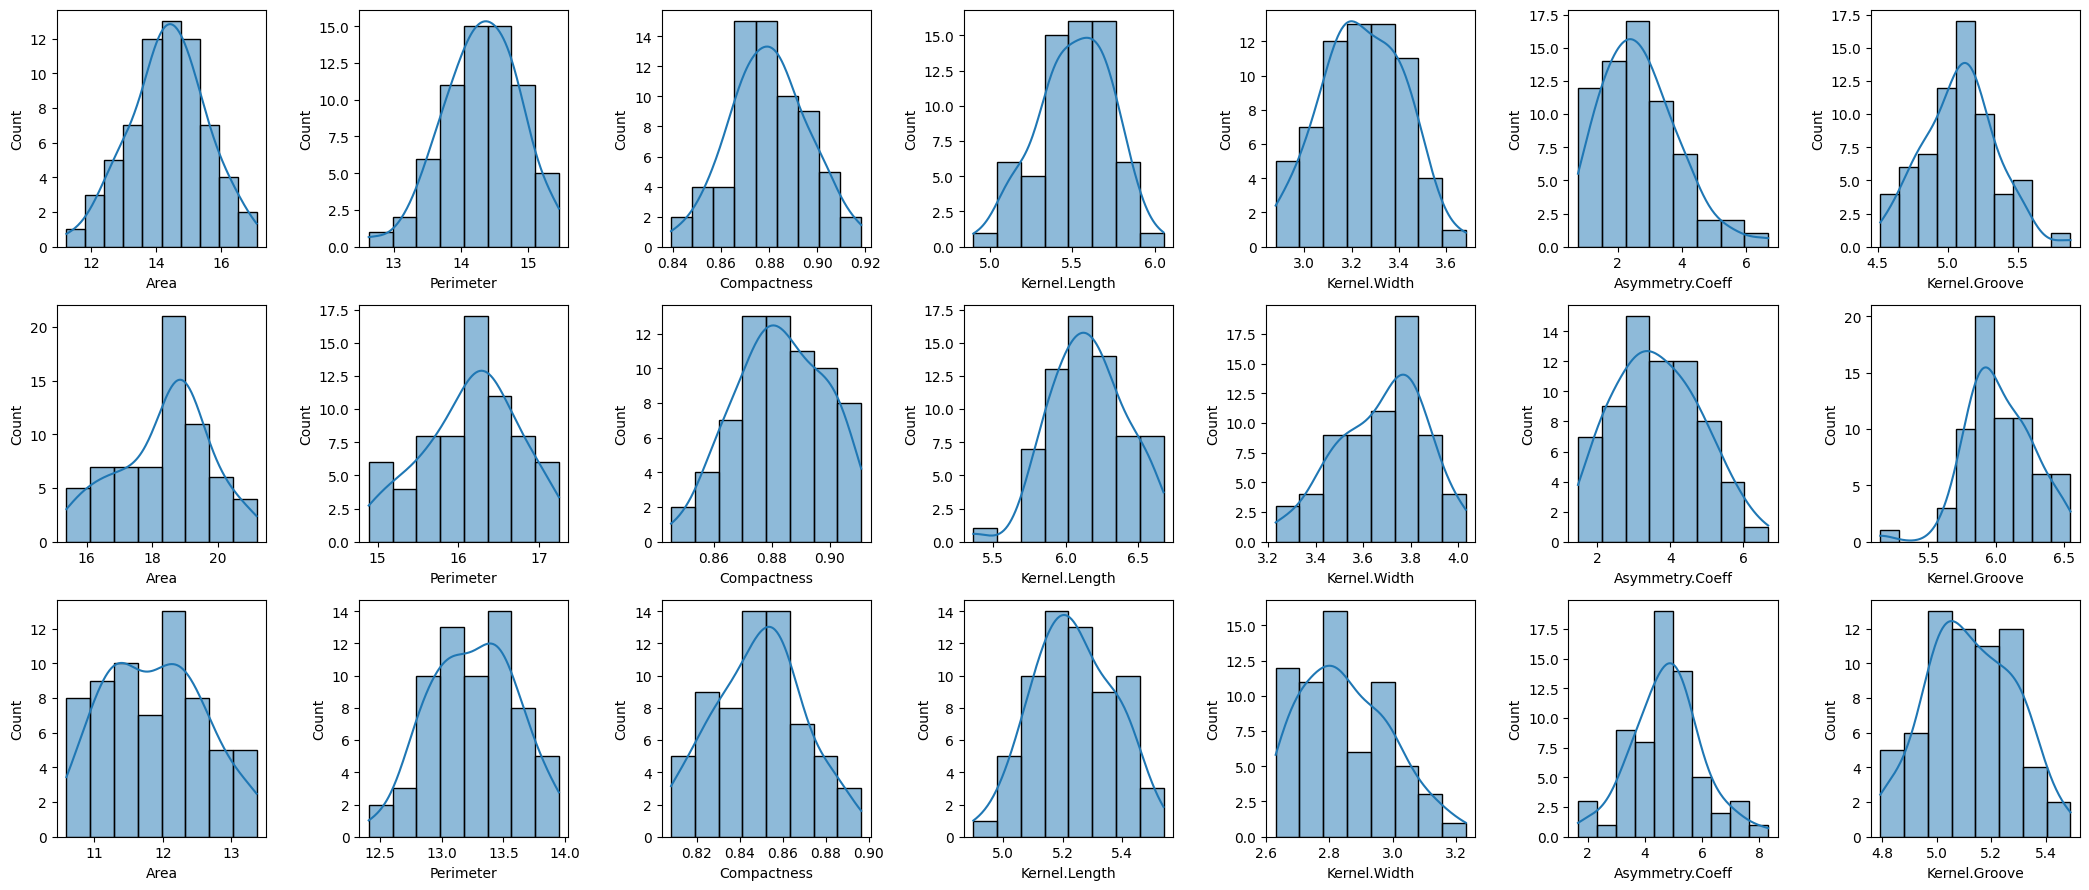

In [7]:
classes = [class_1, class_2, class_3]
fig, axes = plt.subplots(3, 7, figsize=(21, 9))
for i, class_ in enumerate(classes):
    for j, feature_ in enumerate(features):
        sns.histplot(class_[feature_], ax= axes[i, j], kde = True)
plt.tight_layout()
plt.show()

In [8]:
df.isna().sum().sum()

0

In [9]:
df = df.apply(lambda x : ((x - x.min())/(x.max() - x.min())))
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150,0.0
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165,0.0
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665,0.0
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817,0.0
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994,0.0


In [10]:
X = df.iloc[:, 0:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

In [11]:
class_1 = df[df.Type == 0]
class_2 = df[df.Type == 0.5]
class_3 = df[df.Type == 1]
classes = [class_1, class_2, class_3]

In [12]:
def myTrainTestSplit(X, Y, test_size=0.2, random_state=42):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_length = int(len(X) * test_size)
    test_indices = indices[:test_length]
    train_indices = indices[test_length:]
    X_train = X[train_indices]
    X_test = X[test_indices]
    Y_train = Y[train_indices]
    Y_test = Y[test_indices]
    
    return X_train, X_test, Y_train, Y_test


In [13]:
def generateClassBasedTrainData(label, Y_train_):
    classBasedY = []
    for index, label_ in enumerate(Y_train_):
        if label == label_:
            classBasedY.append(1)
        else:
            classBasedY.append(0)  
    return np.array(classBasedY).reshape((Y_train_.shape[0], 1))          

In [14]:
X_train, X_test, Y_train, Y_test = myTrainTestSplit(X, Y)   

In [15]:
class MyLogisticRegression:
    def __init__(self, iter = 1000, learning_rate = 0.0001):
        self.learningRate = learning_rate
        self.numberOfIterations = iter
        self.theta = None
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z)) 
        # return z
    
    def fit(self, x, y):
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        self.theta = np.zeros((x.shape[1], 1))

        for i in range(self.numberOfIterations):
            self.theta = self.theta + self.learningRate*(((y - self.sigmoid(np.matmul(x, self.theta)))*x).sum(axis=0).reshape(x.shape[1], 1))

    def pred(self, x):
        x = np.hstack((np.ones((1, )), x))
        return  self.sigmoid(np.dot(x, self.theta))
        



In [16]:
models = np.empty((3, ), dtype=object)
normalizedClassLAbels = [0, 0.5, 1]
for i, label in enumerate(normalizedClassLAbels):
    classModel = MyLogisticRegression()
    classModel.fit(X_train, generateClassBasedTrainData(label, Y_train))
    models[i] = classModel

In [17]:
pred = []
Y_main = [0, 0.5, 1]
for test in X_test:
    scores = []
    for model in models:
        scores.append(model.pred(test))
    pred.append(Y_main[np.argmax(scores)])

In [18]:
true = 0
for i, j in enumerate(Y_test):
    if(j == pred[i]):
        true += 1
print(true/len(Y_test))

0.8205128205128205


In [50]:
class MyKnnClassifier():
    def __init__(self, k_=4):
        self.k = k_
        self.neighbors = None
    def pred(self, X, Y, query):
        kNearestNeighbors = np.argsort(np.sqrt(np.sum(np.power(query - X, 2), axis=1)))[0:self.k]
        nearestLabels = np.array([Y[i] for i in kNearestNeighbors])
        labels = np.unique(Y)
        counts = []
        for label in labels:
            counts.append(np.count_nonzero(nearestLabels == label))
        return labels[np.argmax(counts)]    

(0.0, 11.0)

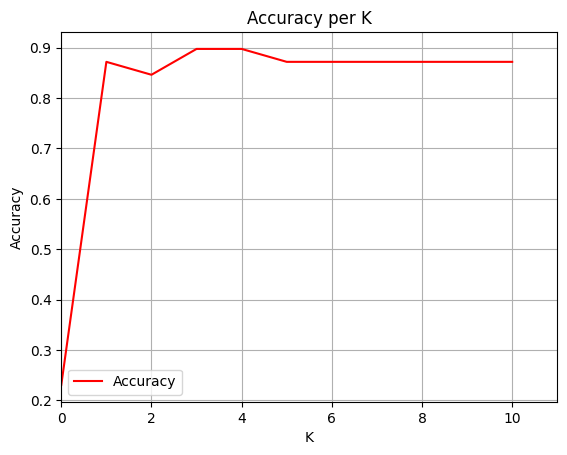

In [61]:
acc = []
for k in range(11):
    m = MyKnnClassifier(k_=k)
    pred = []
    for test in X_test:
        pred.append(m.pred(X_train, Y_train, test))

    true = 0
    for i, j in enumerate(Y_test):
        if(pred[i] == j):
            true += 1
    acc.append(true/len(Y_test))     

plt.plot(np.arange(0, 11), acc, label="Accuracy", color = 'red')
plt.title("Accuracy per K")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.grid()
plt.legend()
plt.xlim((0, 11))